In [28]:
import pandas as pd

df = pd.read_csv('../data/Advertising.csv', index_col=0)
print(df.head())

      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [30]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


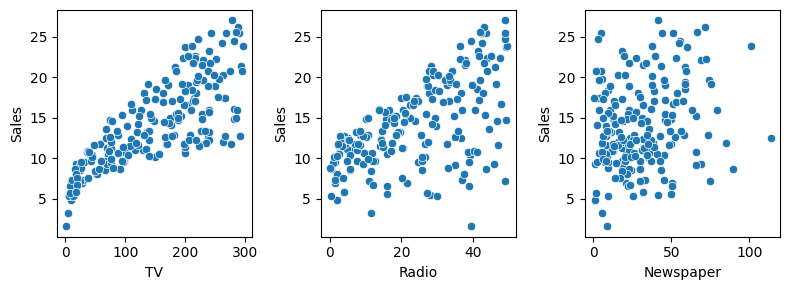

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

number_features = df.shape[1] - 1
fig, ax = plt.subplots(1, number_features, figsize=(8, 3), dpi=100)
for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(data=df, x=feature, y="Sales", ax=ax[i])
fig.tight_layout()

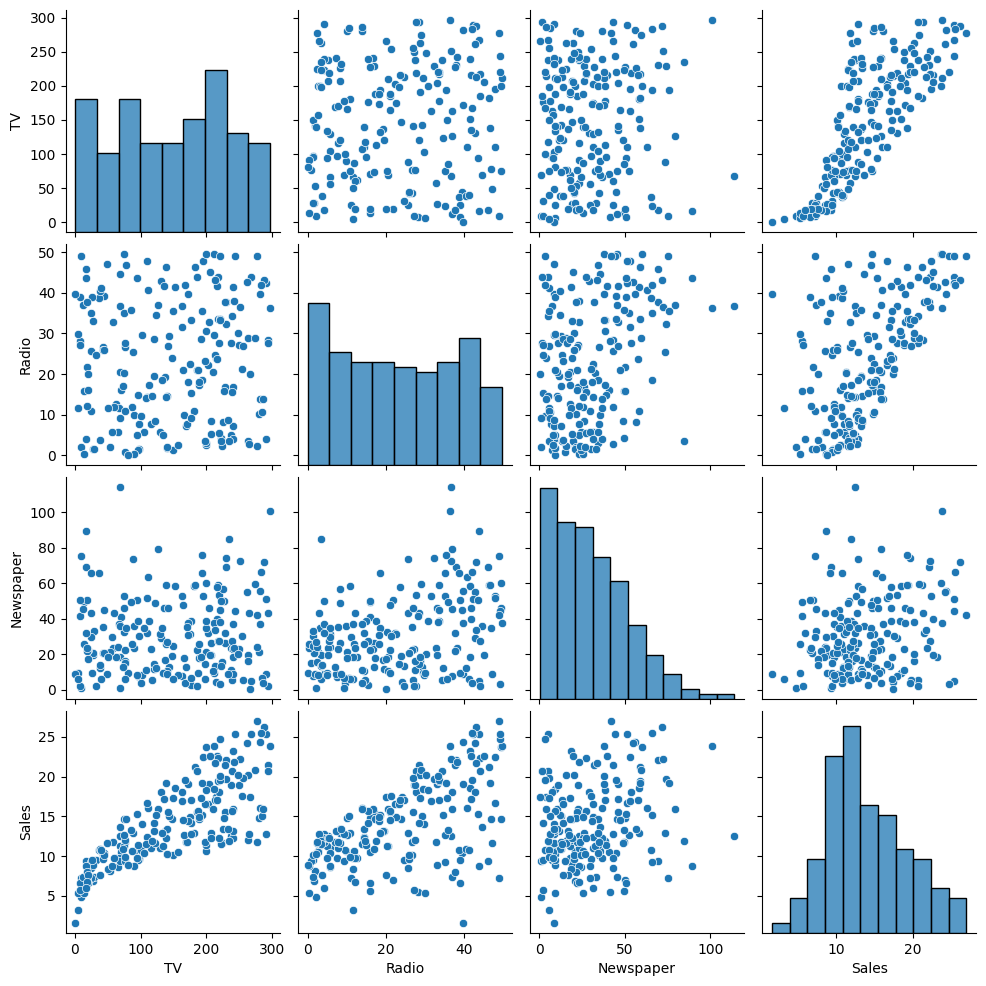

In [32]:
ax = sns.pairplot(df)

Intercept: beta_0: 7.032593549127697
Intercept: beta_1: 0.04753664043301969


[Text(0.5, 1.0, 'TV advertisment linear regression'),
 Text(0.5, 0, 'Thounsends of dollars'),
 Text(0, 0.5, 'Sales thousands of units')]

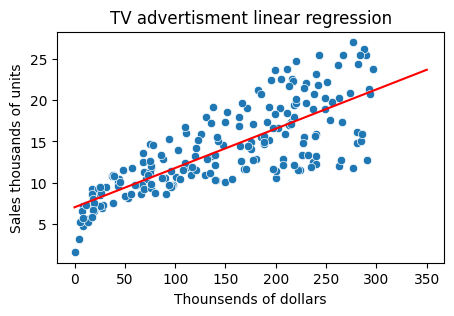

In [33]:
import numpy as np

X, y = df["TV"], df["Sales"] #alltid litet y för respnsvärdet

beta_1, beta_0 = np.polyfit(X, y, deg=1)

y_hat = lambda x: beta_0 + beta_1 * x

print(f"Intercept: beta_0: {beta_0}")
print(f"Intercept: beta_1: {beta_1}")

spend = np.linspace(0, 350)
fig, ax = plt.figure(figsize=(5, 3), dpi=100), plt.axes()

sns.scatterplot(data=df, x="TV", y="Sales")
sns.lineplot(x=spend, y=y_hat(spend), color="red")

ax.set(title="TV advertisment linear regression",
    xlabel="Thounsends of dollars",
    ylabel="Sales thousands of units")



<Axes: xlabel='TV', ylabel='Sales'>

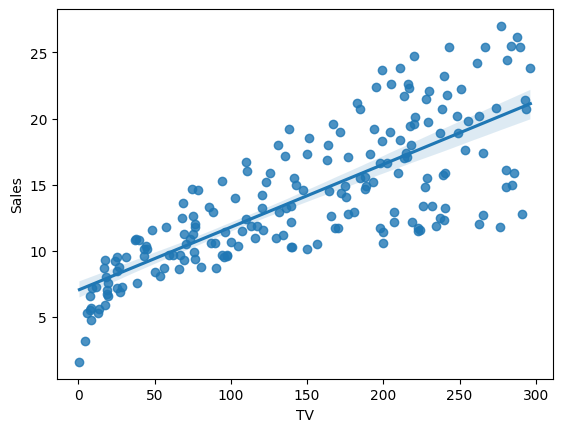

In [34]:
sns.regplot(data=df, x=X, y=y)

In [35]:
from sklearn.linear_model import LinearRegression

X, y = df.drop("Sales", axis="columns"), df["Sales"] #alltid litet y för respnsvärdet
X.insert(0, "Intercept", 1)

model = LinearRegression() #create model
model.fit(X, y) #train model
beta = model.fit(X, y) #train model

beta.coef_ #beta_1, beta_2, beta_3

beta.score(X, y) #R^2

test_sample = [1, 230.1, 37.8, 69.2]

y_hat = model.predict([test_sample])

print(f"TV: 230.1K, Radio: 37.8K, Newspaper: 69.2K -> Sales: {y_hat} thousnads of units")

TV: 230.1K, Radio: 37.8K, Newspaper: 69.2K -> Sales: [20.52397441] thousnads of units


/Users/paraugustsson/Machine-learning-AI24-1/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Test och validering är oliaksa saker. test är för att se hur bra modellen är. validering är för att se hur bra modellen är på nya data

In [ ]:
train_fraction = int(len(df) * 0.7) #70% of the data. Vi vill ha så mycket data som möjligt så länge man har tillräckligt med 

train = df.sample(n=train_fraction, random_state=42, replace=False) #random_state=42 för att få samma randomisering varje gång
val = df.drop(train.index) #tar bort de index som finns i train

X_train, y_train = train.drop("Sales", axis="columns"), train["Sales"] # 
X_val, y_val = val.drop("Sales", axis="columns"), val["Sales"] # 

X_train.insert(0, "Intercept", 1) #lägger till intercept i första kolumnen
X_val.insert(0, "Intercept", 1) #lägger till intercept i första kolumnen

for dataset in ["X_train", "X_val", "y_train", "y_val"]: #loopar igenom alla dataset och printar ut shape
    print(f"Shape of{dataset}: {eval(dataset).shape}") 


Shape ofX_train: (140, 4)
Shape ofX_val: (60, 4)
Shape ofy_train: (140,)
Shape ofy_val: (60,)


In [ ]:
model = LinearRegression() #create model #skapar en ny modell

model.fit(X_train, y_train) #train model #tränar modellen



LinearRegression()

MAE formel??? 

taxicab avståndet siffrorna på axlarna går i rutor  

In [ ]:
n = len(y_val) #antal rader i val

y_hat = model.predict(X_val) #förutsäger y

MAE = np.divide(1, n) * np.sum(np.abs(y_val - y_hat)) #mean absolute error

MSE = np.divide(1, n) * np.sum(np.square(y_val - y_hat)) #mean squared error

RMSE = np.sqrt(MSE) #root mean squared error

RSE = np.sqrt(np.divide(1, n-X_val.shape[1]-2) * np.sum(np.square(y_val - y_hat))) #residual standard error

MAE, MSE, RMSE, RSE

# RMSE 1.88 , standardavikelsen i medlet 
# RSE goodness fit = 1.98 standardavikelsen i felet. Bra mått vid högre mått (lack of fit)
# Inte stabil regression



(np.float64(1.324449095972654),
 np.float64(3.540425618238522),
 np.float64(1.8816018755939106),
 np.float64(1.9833825255071817))

In [ ]:
### text om polynominal regression

### Polynomiell regression
Ett _polynom_ är en form 

$\mathbb{P}(n) = a_0 + a_1x_1 + a_2x_2^2 + \ldots + a_nx_n^n$

Polynomiell regression är ett specialfall av multipel linjär regression men i en variabel:

$y = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n + \epsilon $

Vi har alltså bara en parameter, men flera _features_ (sv. egenskap, oftast svengelska 'fit-sjur'). Varje kolumn är en potens av vår inparameter.

$$
\begin{pmatrix}
 y_1\\
 y_2\\
 \vdots\\
 y_n\\
\end{pmatrix} =
\begin{pmatrix}
 1&  x_1& x_1^2  &\dots & x_1^m \\
 1&  x_2& x_2^2 & \dots & x_2^m\\
 \vdots&\vdots  &\vdots  &\ddots & \vdots\\
 1& x_n & x_n^2 & \dots & x_n^m\\
\end{pmatrix}
\begin{pmatrix}
 \beta_0\\
 \beta_1\\
 \vdots\\
 \beta_m\\
\end{pmatrix} + 

\begin{pmatrix}
 \epsilon_0\\
 \epsilon_1\\
 \vdots\\
 \epsilon_n\\
\end{pmatrix}
$$

Vad är det som är linjärt här egentligen? Jo, det är multiplikation med ett tal (en _skalär_) som är linjär för polynom. Låt $\mathcal{L}(n)$ vara funktionen som multiplicerar ett polynom, säg $\mathbb{P}(2) = x²$, med $n$ -- dvs $\mathcal{L}(3) = 3x²$. Då gäller att
\begin{equation}
\mathcal{L}(a) + \mathcal{L}(b) = \mathcal{L}(a+b)
\end{equation}
Villket är ett tillräckligt villkor för linjäritet. Lite löst uttryckt är det koefficienterna som vi uppskattar så då är problemet vi löser linjärt. Precis som vid multipel regression är det flera linjer vi uppskattar -- en för varje koefficient som alltså är någon sorts viktning eller skalfaktor på varje komponent av polynomet. Det är operationerna på dessa koefficienter i regressionen som alltså är linjära.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ground_truth(x):
    return np.square(x) + .5 * x + 3

samples = 100 

def draw_data(X, y):
   fig, ax = plt.figure(dpi=100)
   ax.plot(X, y, ".", label = "Data")

   X = np.linspace(-3, 3, samples)
   ax.plt(x, ground_truth[x], labels = "Ground truth")

   return 

X = np.random.uniform(-3, 3, samples, 1)
y = ground_truth

draw_data(X, y)


#ej klar

In [ ]:
beta_hat = np.polyfit(X, reshape(-1), 2)

In [42]:
# vi gör om vår indata till en polynimial 

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False) #skapar en ny modell och bryr oss inte om wn intercept

#omvanlda om vår indata till polynimial form
poly_features = poly.fit_transform(X) # transformera vår indata till polynimial form

poly_features[:4], X[:4], np.square(X[:4]) #visar de 4 första raderna


(array([[1.000000e+00, 2.301000e+02, 3.780000e+01, 6.920000e+01,
         1.000000e+00, 2.301000e+02, 3.780000e+01, 6.920000e+01,
         5.294601e+04, 8.697780e+03, 1.592292e+04, 1.428840e+03,
         2.615760e+03, 4.788640e+03],
        [1.000000e+00, 4.450000e+01, 3.930000e+01, 4.510000e+01,
         1.000000e+00, 4.450000e+01, 3.930000e+01, 4.510000e+01,
         1.980250e+03, 1.748850e+03, 2.006950e+03, 1.544490e+03,
         1.772430e+03, 2.034010e+03],
        [1.000000e+00, 1.720000e+01, 4.590000e+01, 6.930000e+01,
         1.000000e+00, 1.720000e+01, 4.590000e+01, 6.930000e+01,
         2.958400e+02, 7.894800e+02, 1.191960e+03, 2.106810e+03,
         3.180870e+03, 4.802490e+03],
        [1.000000e+00, 1.515000e+02, 4.130000e+01, 5.850000e+01,
         1.000000e+00, 1.515000e+02, 4.130000e+01, 5.850000e+01,
         2.295225e+04, 6.256950e+03, 8.862750e+03, 1.705690e+03,
         2.416050e+03, 3.422250e+03]]),
    Intercept     TV  Radio  Newspaper
 1          1  230.1   37.8

In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() #skapar en ny modell
model.fit(poly_features, y) #tränar modellen

model.coef_, model.intercept_ #visar våra beta värden

(array([ 0.00000000e+00,  2.58262743e-02,  1.05371485e-02,  3.44186766e-03,
        -5.70290343e-17,  2.58262743e-02,  1.05371485e-02,  3.44186766e-03,
        -1.09702663e-04,  1.10525949e-03, -4.55155391e-05,  1.11997015e-04,
         8.26605896e-05,  1.19125650e-05]),
 np.float64(5.084781667166762))

In [ ]:
#kode kolla bild

polynomets grad är en hyperparameter 

hur vet man vilken grad polynomet skall ha? Genom att testa : 

In [46]:
np.random.seed(42)

samples = 1000
X = np.random.uniform(-3, 3, (samples, 1))
f = lambda x: x**4 + x**2 + 0.5 * x + 3
y = f(X) + np.random.randn(samples, 1) #lägger till brus


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((670, 1), (82, 1), (83, 1), (670, 1), (82, 1), (83, 1))

In [48]:
from sklearn.metrics import mean_squared_error

RMSE_val = []

for degree in range(1, 100):
    model_poly = PolynomialFeatures(degree, include_bias=False)
    train_features = model_poly.fit_transform(X_train)
    val_features = model_poly.transform(X_val)
    model_linear_regression = LinearRegression()

    model_linear_regression.fit(train_features, y_train)

    y_pred_val = model_linear_regression.predict(val_features)

    RMSE_val.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))

Text(0.5, 1.0, 'RMSE on validation data fro different degrees of polynomials')

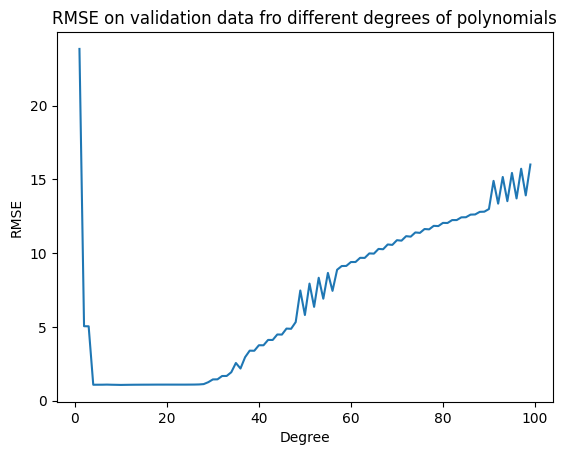

In [50]:
plt.plot(range(1, 100), RMSE_val)
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE on validation data fro different degrees of polynomials")

letar efter ett knä (en punkt där) Knees = lokala minimum
poly.reg = används vid interktionseffekter när det bara är en indata. I boken auto är ett exempel av detts i boken. 

Bias ett annat sätt att säga är...
har vi hög bias - tenderar det att vara en...då är der det vanligt med underfit 
hög varinans tenderar göra en overfit i linjära regressioner. 
Målet ör att hitta enbalans mellan bias och varians. Fler saker som påverkar bias. För lågt bias så öka komlexiteten på modellen men då på verkas variansen till det högre. Detta är en konst lära sig uppskatta.  

övningsuppgift 0, 1 och 2. 